### Python을 활용한 경제 기사 분석


(1) 주제 선정 이유: 작년 한 해 동안 우리나라는 대내외적으로 경제와 관련돼서 다양한 어려움들이 있었습니다. 국내에서는 소득주도성장에 대한 회의적인 시각과 최저임금인상, 국외에서는 미국 연준의 기준금리 인상이 네 차례나 있으면서 정말 한 치 앞도 내다볼 수 없는 혼란스러운 한 해였습니다. 그래서 저는 2018년 네이버 경제 관련 기사들 중 조회수가 높은 기사들을 추출한 후 핵심 키워드들을 뽑아내어서 작년 한 해를 되돌아보는 프로젝트를 진행하기로 결심하게 되었습니다.<br>

(2) 가설 정의: 우리나라 경제가 해외경제의 영향을 많이 받는 많큼 미-중 무역협상, 미국 연준의 기준금리 인상에 따른 여파 등이 주요 키워드로 부각될 것으로 보입니다.<br>

(3) 인터넷을 통한 데이터 획득: 과거 네이버 뉴스 중 경제 부분에서 '많이 본 뉴스' 페이지에 접속, html형태의 정보들을 불러와서 BeautifulSoup이라는 도구를 통해 데이터를 가공하여 리스트 형태로 만들었습니다.<br>

In [1]:
import urllib.request  #url을 다루는데 도움을 주는 모듈
from bs4 import BeautifulSoup   #html과 xml에서 데이터 추출 및 활용
from collections import OrderedDict   #리스트에서 순서변경 없이 중복 제거
import pandas as pd  #pandas 모듈을 이용하여 수학적 계산 및 데이터 저장에 활용

# 1.기간 설정
date_range = pd.date_range(start='20180101', end='20181231')
date_list = list(date_range.strftime("%Y%m%d"))



# 2.네이버 뉴스에서 기사 제목 및 연결되는 링크 추출

FinalLinkList = []
SortedTitleList = []
SortedLinkList = []
for i in date_list:
    date = i
    URL = 'https://news.naver.com/main/ranking/popularDay.nhn?rankingType=popular_day&sectionId=101&date={}'.format(date)
    res = urllib.request.urlopen(URL)

    soup = BeautifulSoup(res,"html.parser")

    contents = soup.find("ol").find_all("a")
    titleList = [title.attrs['title'] for title in contents]
    titleList = list(OrderedDict.fromkeys(titleList))
    for x in range(5):
        SortedTitleList.append(titleList[x])
    
    linkList = [link.attrs['href'] for link in contents]
    linkList = list(OrderedDict.fromkeys(linkList))
    StartURL = 'https://news.naver.com'
    temp = []
    for x in range(5):
        nURL = StartURL + linkList[x]
        SortedLinkList.append(nURL)
        temp.append(nURL)
    FinalLinkList.append(temp)
    
print(FinalLinkList)





    
# 3.새로운 링크를 통해 기사 내용 추출 및 저장

import re

FinalList = []
for x in range(365):
    for i in range(5):
        newURL = FinalLinkList[x][i]
        res2 = urllib.request.urlopen(newURL)
        soup2 = BeautifulSoup(res2,"html.parser")
        body = soup2.find("div",{"id" : "articleBodyContents"})
        body = re.sub("<.*?>", "", str(body))
        body = body.replace('\n','')
        body = body.replace('\xa0','')
        body = body.replace('\t','')
        body = body.replace('// flash 오류를 우회하기 위한 함수 추가function _flash_removeCallback() {}','')
        
        body = body.replace('것','')
        body = body.replace('등','')
        body = body.replace('있다','')
        body = body.replace('수','')
        body = body.replace('이','')
        body = body.replace('더','')
        body = body.replace('고','')
        body = body.replace('기자','')
        body = body.replace('있는','')
        body = body.replace('및','')
        body = body.replace('연합뉴스','')
        body = body.replace('중','')
        body = body.replace('명','')
        body = body.replace('며','')
        body = body.replace('로','')
        body = body.replace('를','')
        body = body.replace('개','')
        body = body.replace('그','')
        body = body.replace('입니다','')
        body = body.replace('무단','')
        body = body.replace('배포','')
        body = body.replace('점','')
        body = body.replace('같은','')
        body = body.replace('관련','')
        body = body.replace('의','')
        body = body.replace('곳','')
        body = body.replace('날','')
        FinalList.append(body)
        


        

# 4.데이터 분석 및 시각화


new_date_list = []
for x in range(365):
    for i in range(5):
        new_date_list.append(date_list[x])
print(len(new_date_list))
print(len(SortedTitleList))
print(len(SortedLinkList))
d = {'날짜':new_date_list, '기사 제목':SortedTitleList, '기사 내용':FinalList ,'기사 링크':SortedLinkList}
df = pd.DataFrame(data = d)
df.to_csv("csvfile_test.csv", mode='w',index=False)
data = pd.read_csv("csvfile_test.csv", index_col=0)
print(data)


[['https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0009783610&date=20180101&type=1&rankingSectionId=101&rankingSeq=1', 'https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=055&aid=0000599122&date=20180101&type=2&rankingSectionId=101&rankingSeq=2', 'https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=005&aid=0001060778&date=20180101&type=1&rankingSectionId=101&rankingSeq=3', 'https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=022&aid=0003238548&date=20180101&type=1&rankingSectionId=101&rankingSeq=4', 'https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0009784718&date=20180101&type=1&rankingSectionId=101&rankingSeq=5'], ['https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=018&aid=0004003275&date=20180102&type=1&rankingSectionId=101&rankingSeq=1', 'https://news.naver.com/main/ranking/read.nhn?rankingType=popular_day&oid=001&aid=0009785856&dat

1825
1825
1825
                                             기사 제목  \
날짜                                                   
20180101              오늘부터 가상화폐 신규거래 불가…20일께 재개될 듯   
20180101            압박 느낀 다주택자들, 집 내놓을까…새해 부동산 전망은   
20180101      ①파월 파워 ②비트코인 역풍… 2018 글로벌경제 ‘5대 키워드’   
20180101                   화장품·외식비 줄인상… 심상찮은 연초 물가   
20180101    버핏, 세기의 대결서 헤지펀드에 압승…상금 24억원 자선단체로(종합)   
20180102           대형마트 ‘반품 갑질’ 사라진다…발주시 수량 기재 의무화   
20180102                비트코인 새해 첫날 하락세…2015년 이후 처음   
20180102            '보유세 개편' 닻 올렸지만…세입자 '부담 전가' 우려   
20180102                    홍콩세관서 韓 '짝퉁' 화장품 대량 적발   
20180102        [현장르포] 최저임금 시간당 7530원..인건비 줄이기 본격화   
20180103            '사드해빙' 맞나…中, 한국산 車배터리 보조금 또 제외   
20180103                    외국인 1.7%만 쓰는 ‘이게 뭐죠’카드   
20180103         서민 자영업 '흔들'…작년 음식·주점업 생산 사상 최대 감소   
20180103         파리바게뜨 노사 협상 결렬…노조 "해피파트너즈는 대안 아냐"   
20180103               [단독] 가상화폐 실명제 전엔 추가 투자도 막는다   
20180104        '라면+김밥'이 가벼운 한끼?…작년 서민 외식물가 껑충(종합)   
20180104     

In [2]:
!pip install konlpy

  Using cached https://files.pythonhosted.org/packages/e5/3d/4e983cd98d87b50b2ab0387d73fa946f745aa8164e8888a714d5129f9765/konlpy-0.5.1-py2.py3-none-any.whl


In [2]:
#4.1 데이터 분석


from collections import Counter
from konlpy.tag import Okt


twitter = Okt()

morph_list = []
for article in FinalList:
    morph = twitter.pos(article, norm = True)
    morph_list.append(morph)

noun_adj_list = []
for morph in morph_list:
    for word, tag in morph:
        if tag in ['Noun','Adjective']:
            noun_adj_list.append(word)

counts = Counter(noun_adj_list)
words = counts.most_common(100)

In [49]:
#4,2 데이터 시각화
!pip install wordcloud

{'서울': 3436, '주택': 3192, '정부': 3139, '말': 3001, '재': 2734, '국': 2464, '한국': 2413, '가격': 2399, '미국': 2247, '은': 2157, '후': 2064, '시장': 2031, '도': 2031, '전': 1937, '대출': 1855, '뉴스': 1844, '상': 1823, '아파트': 1820, '경우': 1762, '대한': 1673, '거래': 1616, '지난해': 1611, '때문': 1592, '인상': 1575, '소득': 1568, '경제': 1528, '사': 1527, '부동산': 1477, '달': 1471, '금지': 1466, '위': 1458, '지난': 1434, '올해': 1391, '보': 1388, '세': 1372, '주': 1370, '기준': 1349, '번': 1334, '기업': 1311, '증가': 1310, '인': 1290, '때': 1286, '대해': 1282, '가구': 1280, '지역': 1272, '최근': 1257, '상황': 1255, '투자': 1231, '가상': 1220, '내': 1203, '금리': 1195, '하락': 1193, '은행': 1192, '건': 1190, '자': 1187, '문제': 1183, '발표': 1174, '관계자': 1172, '미': 1159, '조사': 1150, '화폐': 1148, '원': 1146, '금융': 1130, '상승': 1120, '씨': 1118, '데': 1112, '사업': 1099, '공급': 1097, '부담': 1089, '위해': 1075, '가장': 1073, '시간': 1060, '직원': 1060, '차': 1055, '회장': 1049, '평균': 1046, '대책': 1040, '제': 1029, '집': 1028, '안': 1014, '입': 971, '관세': 961, '일': 956, '전망': 939, '용': 939, '업체': 934, 

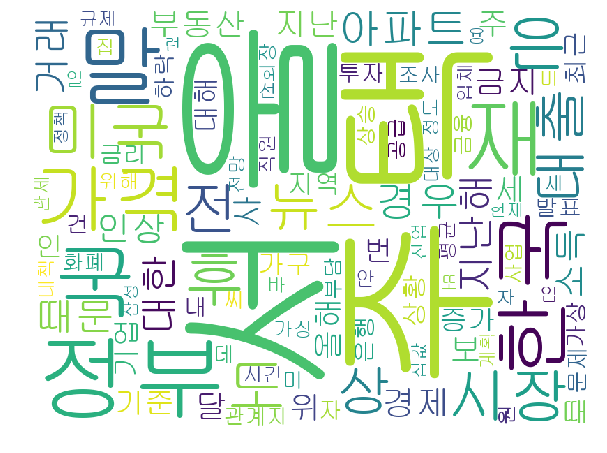

In [4]:
#4,2 데이터 시각화
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(font_path='C:\Windows\Fonts\gulim', background_color='white', width=800, height=600)
print(dict(words))
cloud = wc.generate_from_frequencies(dict(words))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()